# Digit Classification 
Digits Classification is like a hello world project to the machine learning and is one of the major application of the Deep Learning

In [1]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# keras.datasets.mnist.load_data()
returns 2 Numpy arrays <br>
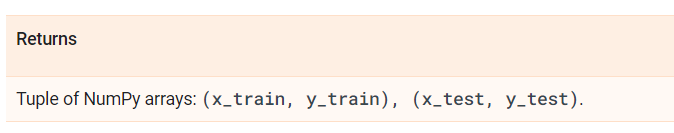
<br>
Link  to docs: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

In [2]:
(X_train, y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape,y_train.shape,X_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

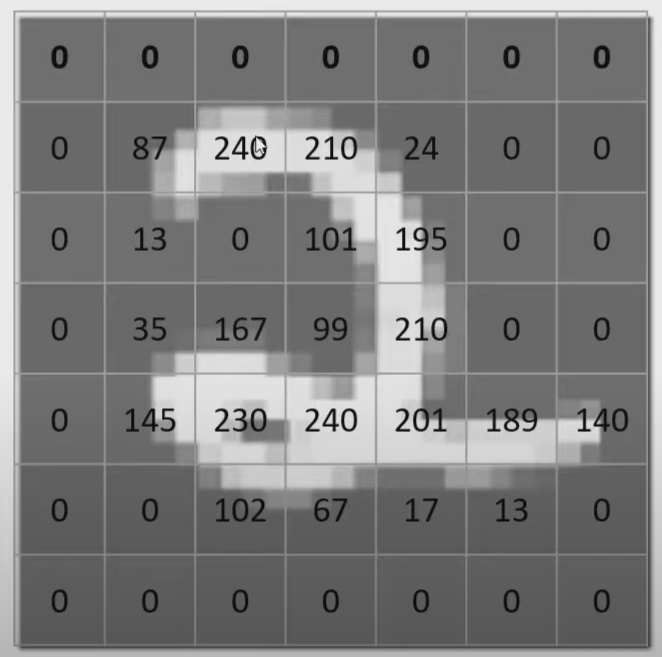
SOURCE: https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/1_digits_recognition/digits_recognition_neural_network.ipynb

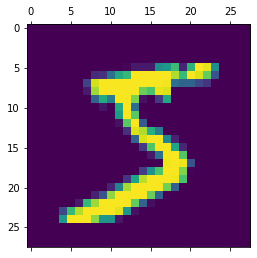

In [6]:
plt.matshow(X_train[0])
plt.show()

In [7]:
y_train[0]

5

>Now we get the clear picture on what train and test data are all about

# matplotlib.pyplot.matshow() 


In [8]:

# an array with linearly increasing values
array = np.diag(range(10))
print(array)
plot.matshow(array)
 
plot.show()

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 7 0 0]
 [0 0 0 0 0 0 0 0 8 0]
 [0 0 0 0 0 0 0 0 0 9]]


NameError: name 'plot' is not defined

In [ ]:
len(X_train)

In [ ]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened =  X_test.reshape(len(X_test),28*28)


In [ ]:
X_train_flattened.shape, X_test_flattened.shape

![theory](images\1.jpg)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

``` keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')```
<br>
 states that output = 10 , input = 784 pixels
- Optimizer allows us to train efficiently 
- It helps us to reach the minima in an efficient way
> *sparse_categorical_crossentropy*  
    >>- is used as the output is categorical **(categorised to 0,1,2,3..9)**
    >>- **sparse** y_train is number
*Had there been **One Hot Encoding** , categorical_crossentropy would have been nice
---
epochs
: the number of iterations for which each neural network goes undergo training

#### It is alwasy good to scale the data in ML as it improves the accuracy 
*Let's check whether this is right or not*

In [14]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255


In [ ]:
X_train_scaled.shape

In [ ]:
X_train_flattened_scaled = X_train_scaled.reshape(len(X_train_scaled),28*28)
X_test_flattened_scaled = X_test_scaled.reshape(len(X_test_scaled),28*28)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation ='sigmoid')
])
model.compile(optimizer ="adam",
             loss = 'sparse_categorical_crossentropy',
             metrics =['accuracy'])
model.fit(X_train_flattened_scaled,y_train,epochs = 5)

In [ ]:
model.evaluate(X_test_flattened, y_test)

In [ ]:
model.evaluate(X_test_flattened_scaled, y_test)

In [ ]:
y_predicted = model.predict(X_test_flattened_scaled)
y_predicted[0]

In [ ]:
plt.matshow(X_test[0])

In [ ]:
np.argmax(y_predicted[0])

Finding the labels of the prediction can be done using `np.argmax()`

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5], y_test[:5]

# CONFUSION MATRIX

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(cm,annot = True,fmt='d')
    plt.xlabel('Predicted')
plt.ylabel('Truth')


# Hidden Layers

In [16]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation ='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit( X_train_scaled,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2783 - accuracy: 0.9220
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1269 - accuracy: 0.9624
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0866 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0661 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0515 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0425 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0329 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0285 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0231 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.019

In [17]:
model.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0878 - accuracy: 0.9775


[0.0878334790468216, 0.9775000214576721]